In [1]:
from simulation import *
from aesthetics import *
from models import *
from data import *

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)

In [3]:
import pandas as pd
import scipy as sc
import os as os
import re as re

# Fit a function for flux

In [290]:
populations = []
fluxes = []
def objective(p):
    # print(p)
    bins = 5
    populations.append(p)
    # Hack for COBYLA... 
#     if np.any(p < 0):
#         return 999
    this = simulation()
    this.name = 'Test'
    this.unbound = p[0:bins - 1] # Energy
    this.bound = p[bins:] # Energy
    this.simulate(pka_md_data=False, user_energies=True)
    if np.mean(this.flux_u + this.flux_b) > -100 and np.mean(this.flux_u + this.flux_b) < -99:
        this.plot_ss()
    fluxes.append(np.mean(this.flux_u + this.flux_b))
    print(np.mean(this.flux_u + this.flux_b))
    return np.mean(this.flux_u + this.flux_b)

In [245]:
# guess = [0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0]
guess = np.random.rand(2 * 5)
cons = ({'type': 'eq', 'fun': lambda x:  1 - sum(x)})
bnds = tuple((0,1) for x in guess)

result = sc.optimize.minimize(objective, guess, method='SLSQP',
                             bounds=bnds,
                             constraints=cons)



0.000381334684789
0.000381334684789
0.000383236911148
0.000382963102311
0.000383329577744
0.000380103476346
0.000381334684789
0.000382471363991
0.000378470867872
0.000380392186344
0.000380165874958
0.000381334684789
2.91038304567e-08
2.91038304567e-08
2.67289578915e-07
-3.12691554427e-07
-1.18743628263e-08
1.53668224812e-07
2.91038304567e-08
9.33650881052e-08
-5.84404915571e-08
2.33761966228e-07
-2.3515895009e-07
2.91038304567e-08
2.18860805035e-07
-2.73576006293e-07
-5.35044819117e-07
-1.00093893707e-06
-5.49480319023e-07
-1.93249434233e-07
-2.46334820986e-07
-3.95812094212e-09
6.23986124992e-08
-1.39698386192e-09
-5.58793544769e-08


/home/dslochower/anaconda3/lib/python3.5/site-packages/scipy/optimize/_minimize.py:400: RuntimeWarning: Method COBYLA cannot handle bounds.
  RuntimeWarning)


5.9581361711e-07
-2.421438694e-08
0.00452441070229
5.0337985158e-06
-0.00452358042821
-0.00452358042821
0.00136356987059
-0.00507468008436
-0.0114038285101
0.000453888787888
-0.0114038285101
-0.00770780147286
-0.0155990808271
-0.0115909009473
-0.0179460000945
-0.0190129441908
-0.0193997058086
-0.0127283108304
-0.0320486790733
-0.0355861743446
-0.0527330210898
-0.0733801650349
-0.0806638111826
-0.101049382938
-0.160294049885
-0.225255220663
-0.246800915338
-0.252951011993
-0.412324259058
-0.232431588694
-0.459472422488
-0.261165493168
-0.349133376963
-0.469247492962
-0.536218822934
-0.635288184509
-0.580981188454
-0.648381491192
-0.652041002177
-0.779227276333
-0.699063470587
-0.802604789846
-1.15130598843
-1.49910984933
-1.73106482066
-0.637704925612
-1.66514893994
-1.2081218753
-1.31379878893
-1.87742838077
-2.01465494931
-2.2229726743
-2.09482477047
-2.61333322152
-2.5857732594
-3.52895856462
-4.03304587305
-5.12696129084
-6.16756581143
-6.24534442276
-6.04117398895
-9.20711749792
-1

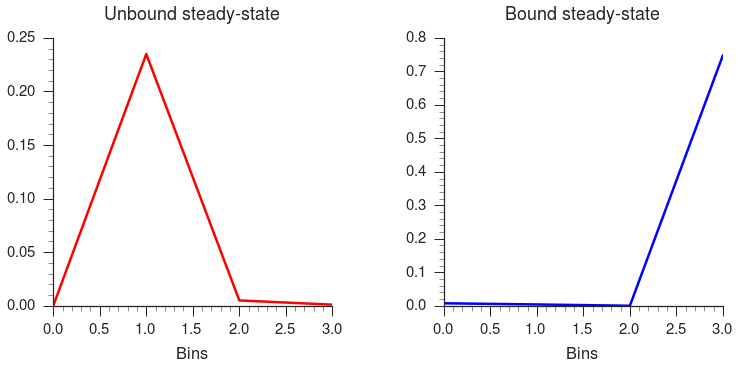

-99.1065995599
-98.6114380366
-98.5210727863


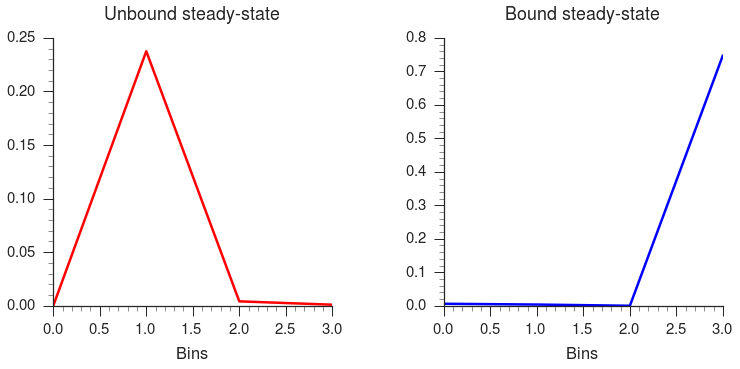

-99.186957146


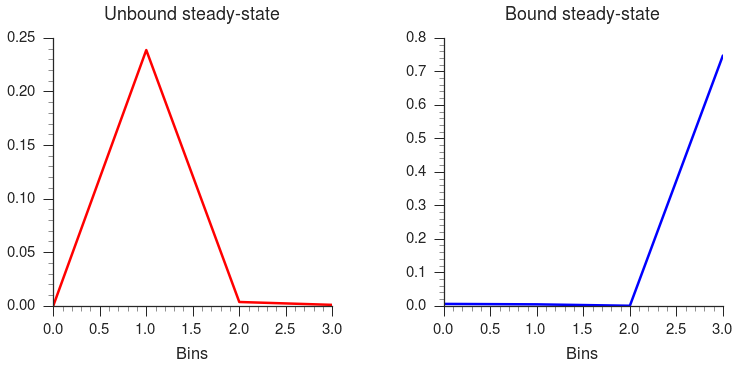

-99.4624993328


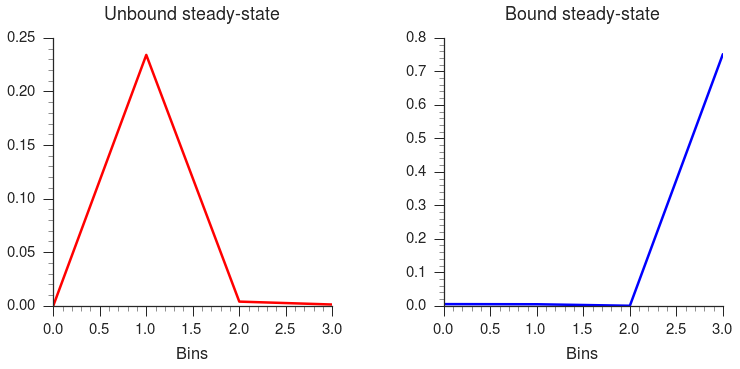

-99.5927336714
-100.006053861
-100.51888526
-100.804248488
-100.674358825
-100.721459971
-100.972123358
-100.414570643
-101.068601391
-101.232425932
-101.73939035
-101.783063149
-101.745795803
-102.023081949
-101.771361071
-102.031220159
-102.305539259
-102.357502512
-102.813534927
-101.965589434
-102.404873282
-102.805801479
-103.096478147
-103.100418901
-103.103901192
-103.156018404
-103.158310025
-103.250324265
-103.635061861
-103.850165524
-104.068375964
-104.284369837
-104.440945959
-104.700593501
-104.746417879
-104.90891687
-105.010997303
-104.693207941
-105.168076616
-105.247413799
-105.348238603
-105.340460915
-105.404449815
-105.44024554
-105.490875216
-105.681242032
-105.803934054
-105.783491418
-105.582512904
-106.101503268
-105.639009724
-105.929527419
-105.725995545
-105.826172376
-105.639719161
-105.668166143
-105.811060887
-105.538767838
-105.691496371
-105.881230157
-105.704063741
-105.856210684
-105.565579427
-105.988503333
-105.891985504
-105.849504622
-105.957719901

In [291]:
guess = [0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0]
cons = ({'type': 'ineq', 'fun': lambda x: sum(x) < 1.1,
         'type': 'ineq', 'fun': lambda x: sum(x) > 0.9,
         'type': 'ineq', 'fun': lambda x: x})
bnds = tuple((0,1) for x in guess)

result = sc.optimize.minimize(objective, guess, method='COBYLA',
                             bounds=bnds,
                             constraints=cons)

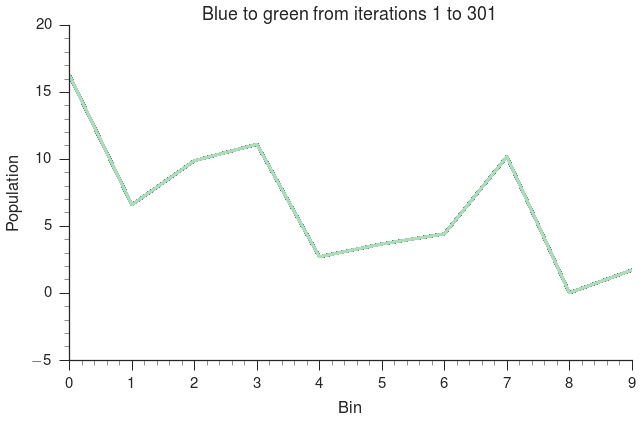

In [292]:
fig = plt.figure(figsize=(1.6802*6, 6))
ax = fig.add_subplot(111)
clrs = sns.color_palette("GnBu_d", n_colors=len(populations))

for i in np.arange(1, len(populations), 1):
    ax.plot(range(10), populations[i], color=clrs[i], alpha=0.2)
ax.set_xlabel('Bin')
ax.set_ylabel('Population')
ax.set_title('Blue to green from iterations 1 to {}'.format(len(populations)))
pretty_plot(fig)

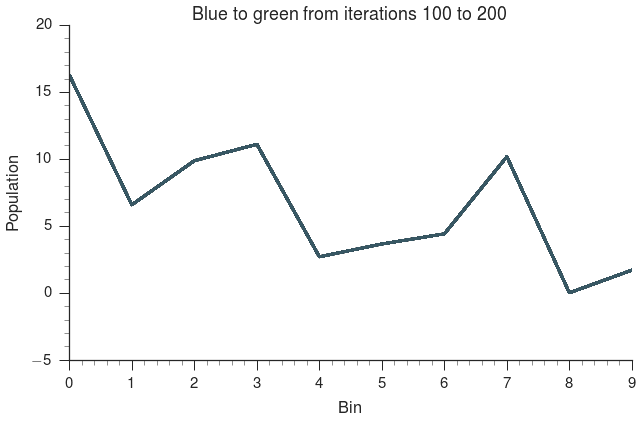

In [279]:
fig = plt.figure(figsize=(1.6802*6, 6))
ax = fig.add_subplot(111)
clrs = sns.color_palette("GnBu_d", n_colors=len(populations))

for i in np.arange(100, 200, 1):
    ax.plot(range(10), populations[i], color=clrs[i], alpha=1)
ax.set_xlabel('Bin')
ax.set_ylabel('Population')
ax.set_title('Blue to green from iterations {} to {}'.format(100, 200))
pretty_plot(fig)

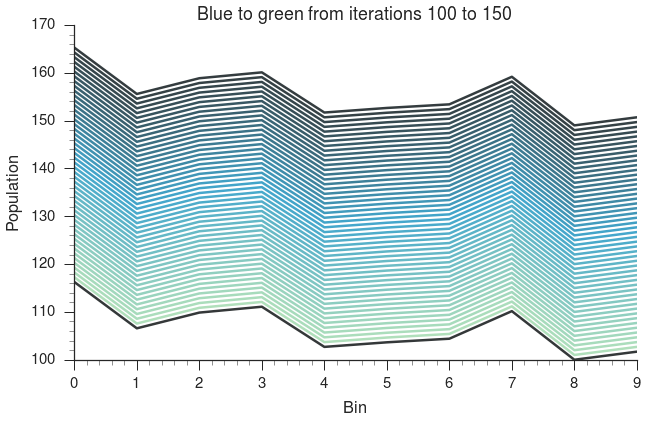

In [280]:
fig = plt.figure(figsize=(1.6802*6, 6))
ax = fig.add_subplot(111)
clrs = sns.color_palette("GnBu_d", n_colors=50)

for i in np.arange(100, 150, 1):
    ax.plot(range(10), populations[i]+i, color=clrs[100-i])
ax.set_xlabel('Bin')
ax.set_ylabel('Population')
ax.set_title('Blue to green from iterations 100 to 150')
pretty_plot(fig)

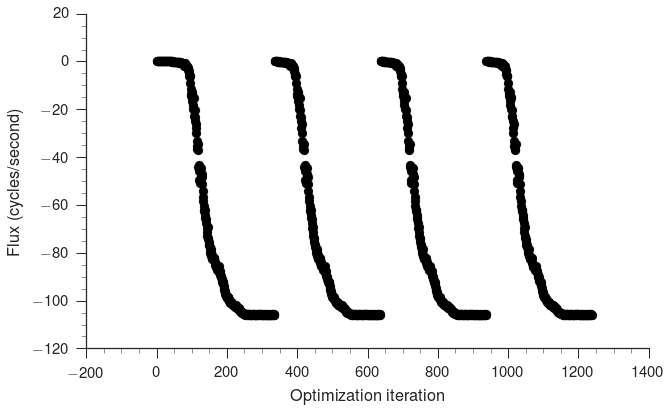

In [282]:
fig = plt.figure(figsize=(1.6802*6, 6))
ax = fig.add_subplot(111)
clrs = sns.color_palette("GnBu_d", n_colors=100)

for i in np.arange(1, len(fluxes), 1):
    ax.scatter(i, fluxes[i], color='k', s=80)
ax.set_xlabel('Optimization iteration')
ax.set_ylabel('Flux (cycles/second)')
pretty_plot(fig)

# Dumped serine 311 psi values from Chimera

In [232]:
values = np.genfromtxt('/home/dslochower/data/projects/nonequilibrium/md-data/McClendon/mike_pka_apo_and_closed_1Mg/tmp.dat', skip_header=2)

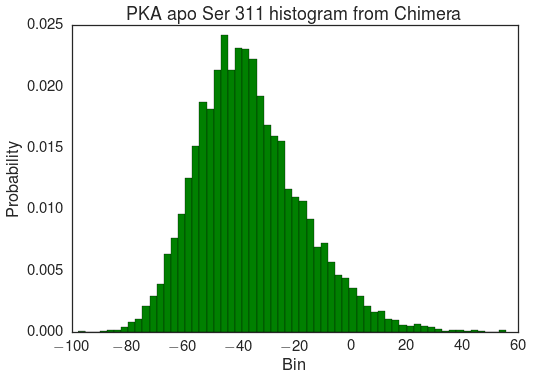

In [235]:
plt.hist(values[:, 1], bins=60, color='g', normed=True)
plt.title('PKA apo Ser 311 histogram from Chimera')
plt.ylabel('Probability')
plt.xlabel('Bin')

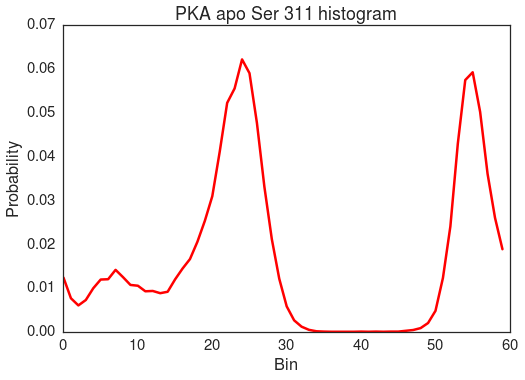

In [229]:
values = np.genfromtxt('/home/dslochower/data/projects/nonequilibrium/md-data/pka-md-data/apo/psiSER311_chi_pop_hist_targ.txt', skip_header=1)
plt.plot(values, color='r')
plt.title('PKA apo Ser 311 histogram')
plt.ylabel('Probability')
plt.xlabel('Bin')

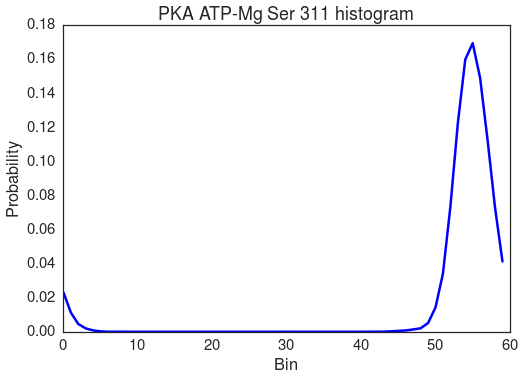

In [236]:
values = np.genfromtxt('/home/dslochower/data/projects/nonequilibrium/md-data/pka-md-data/atpmg/psiSER311_chi_pop_hist_ref.txt', skip_header=1)
plt.plot(values, color='b')
plt.title('PKA ATP-Mg Ser 311 histogram')
plt.ylabel('Probability')
plt.xlabel('Bin')

In [237]:
values

array([  2.30355718e-02,   1.11503087e-02,   4.49372139e-03,
         1.95287892e-03,   7.76951829e-04,   2.30985679e-04,
         2.09986981e-05,   4.19973962e-05,   2.09986981e-05,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         2.09986981e-05,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   2.09986981e-05,
         4.19973962e-05,   6.29960942e-05,   2.51984377e-04,
         5.03968754e-04,   7.55953131e-04,   1.34391668e-03,
         2.03687371e-03,